In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
awards_players_df = pd.read_csv('../data/awards_players.csv')
coaches_df = pd.read_csv('../data/coaches.csv')
players_teams_df = pd.read_csv('../data/players_teams.csv')
players_df = pd.read_csv('../data/players.csv')
series_post_df = pd.read_csv('../data/series_post.csv')
teams_post_df = pd.read_csv('../data/teams_post.csv')
teams_df = pd.read_csv('../data/teams.csv')

## Awards players dataset exploration

### Number of awards per player 

Number of unique awards: 12


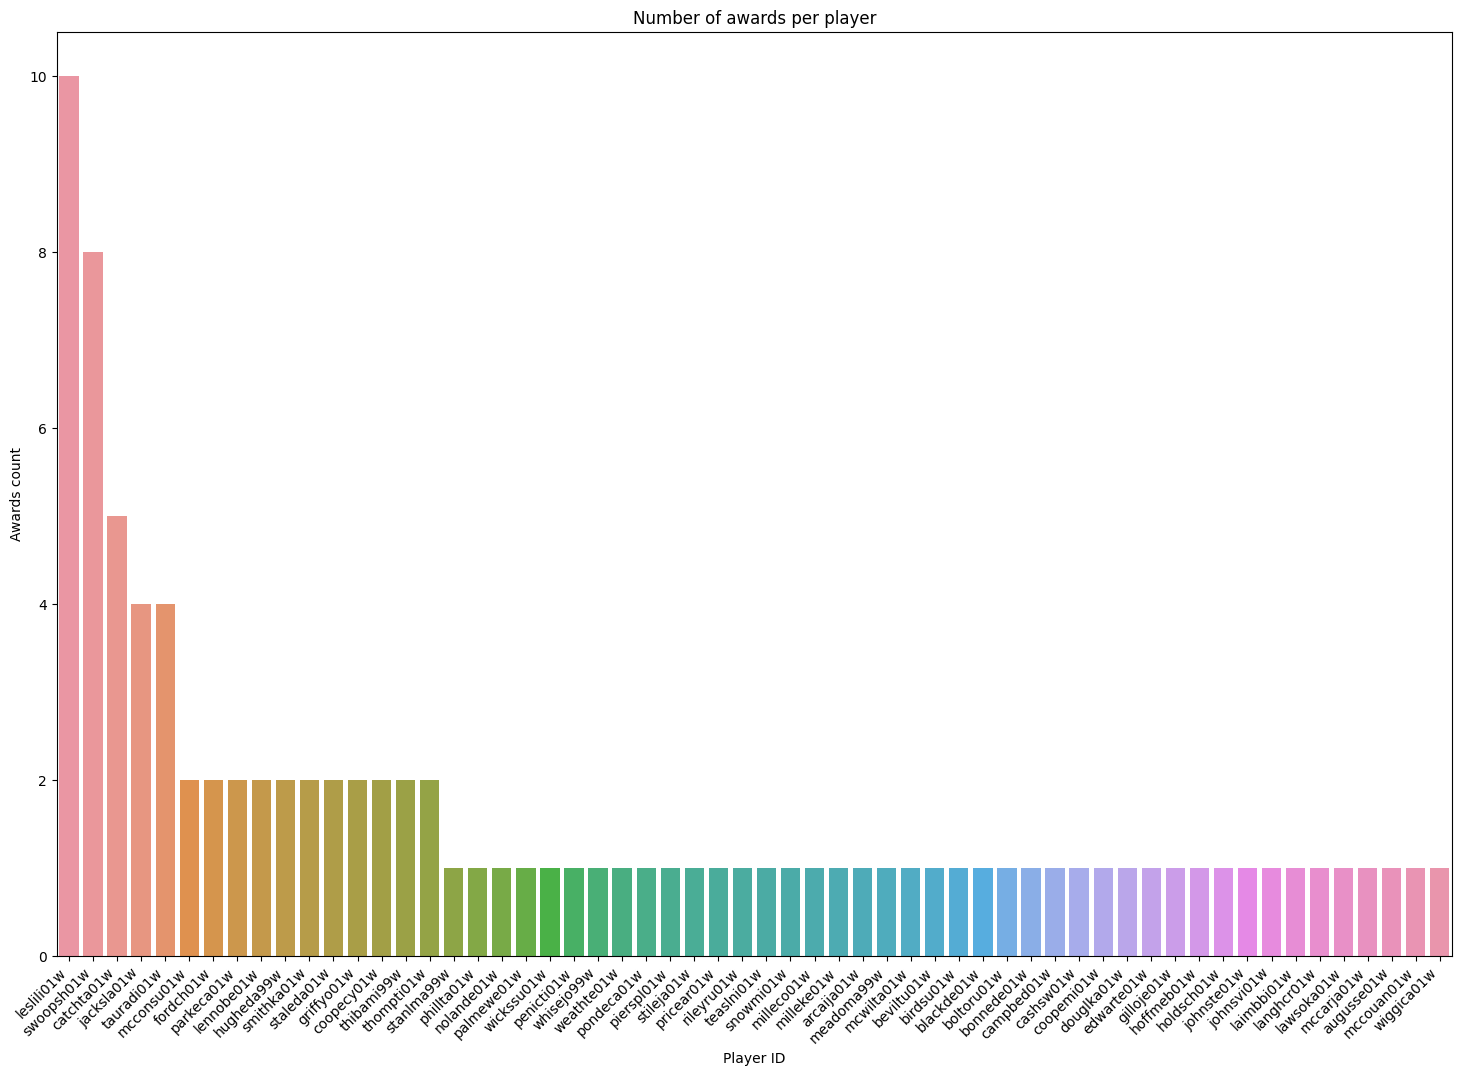

In [3]:
# Number of unique awards
print("Number of unique awards:", awards_players_df['award'].nunique()) 

# Number of awards for each player
player_awards_count = awards_players_df.groupby('playerID')['award'].count().reset_index()

# Sort players based on the number of awards in descending order
player_awards_count = player_awards_count.sort_values(by='award', ascending=False)

# Create the bar plot
plt.figure(figsize=(18, 12))
sns.barplot(x='playerID', y='award', data=player_awards_count)
plt.title('Number of awards per player')
plt.xlabel('Player ID')
plt.ylabel('Awards count')
plt.xticks(rotation=45, ha='right') 
plt.show()

## Coaches dataset exploration

### Wins and losses vs post season wins and losses

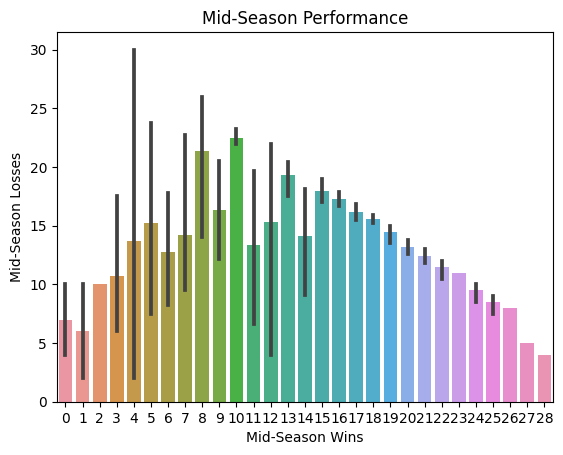

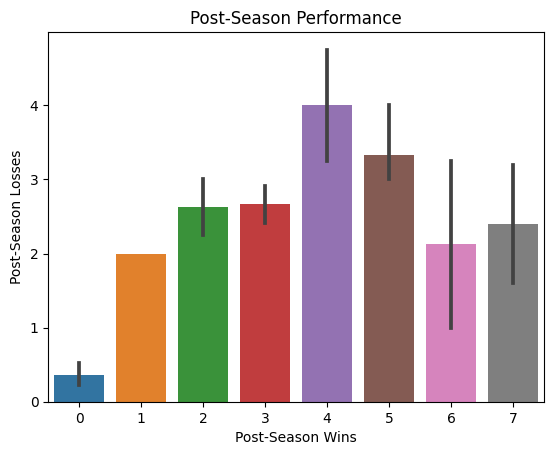

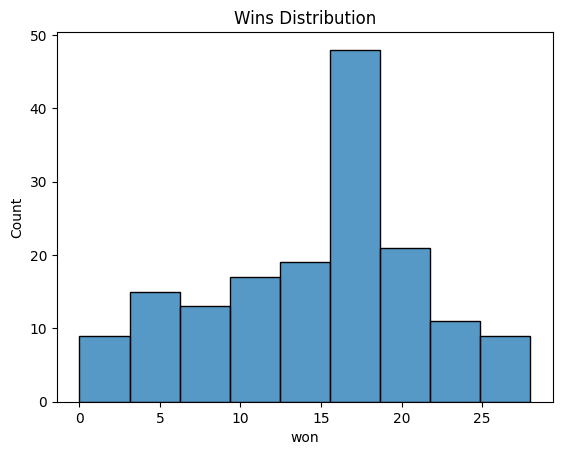

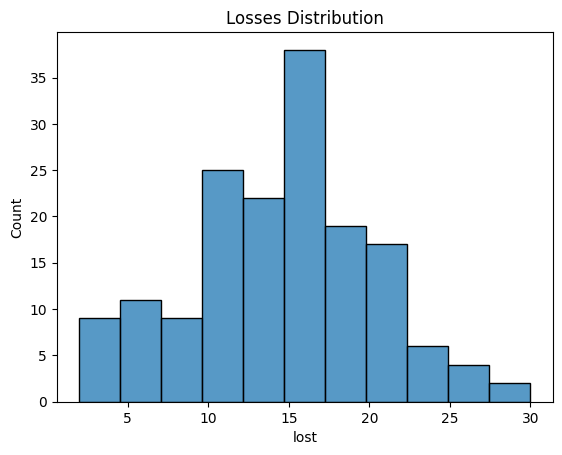

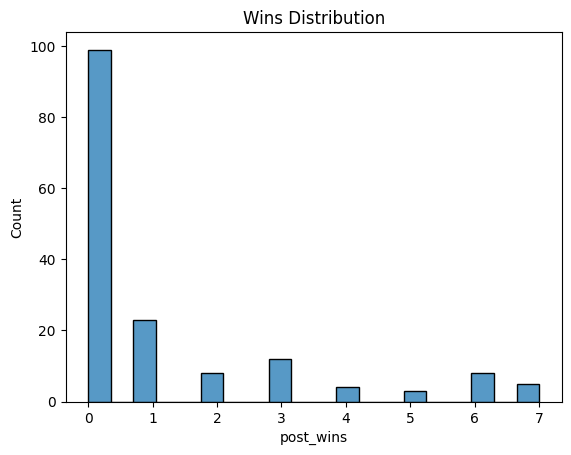

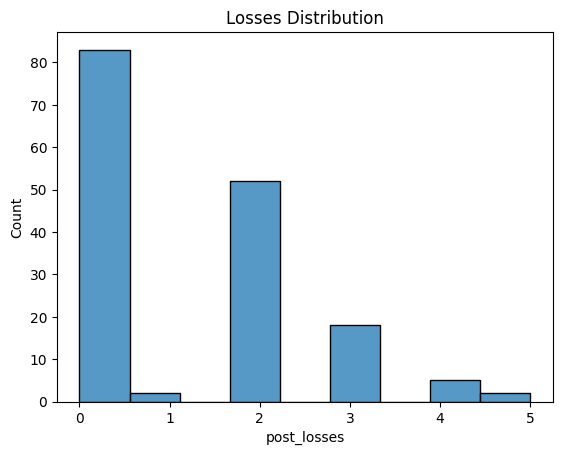

In [4]:
# Bar plot of season wins and losses
sns.barplot(x='won', y='lost', data=coaches_df)
plt.title('Mid-Season Performance')
plt.xlabel('Mid-Season Wins')
plt.ylabel('Mid-Season Losses')
plt.show()

# Bar plot of post-season wins and losses
sns.barplot(x='post_wins', y='post_losses', data=coaches_df)
plt.title('Post-Season Performance')
plt.xlabel('Post-Season Wins')
plt.ylabel('Post-Season Losses')
plt.show()

sns.histplot(coaches_df['won'],  bins='auto')
plt.title('Wins Distribution')
plt.show()

sns.histplot(coaches_df['lost'], bins='auto')
plt.title('Losses Distribution')
plt.show()

sns.histplot(coaches_df['post_wins'],  bins='auto')
plt.title('Wins Distribution')
plt.show()

sns.histplot(coaches_df['post_losses'], bins='auto')
plt.title('Losses Distribution')
plt.show()

### Barplot with wins and losses for each coach

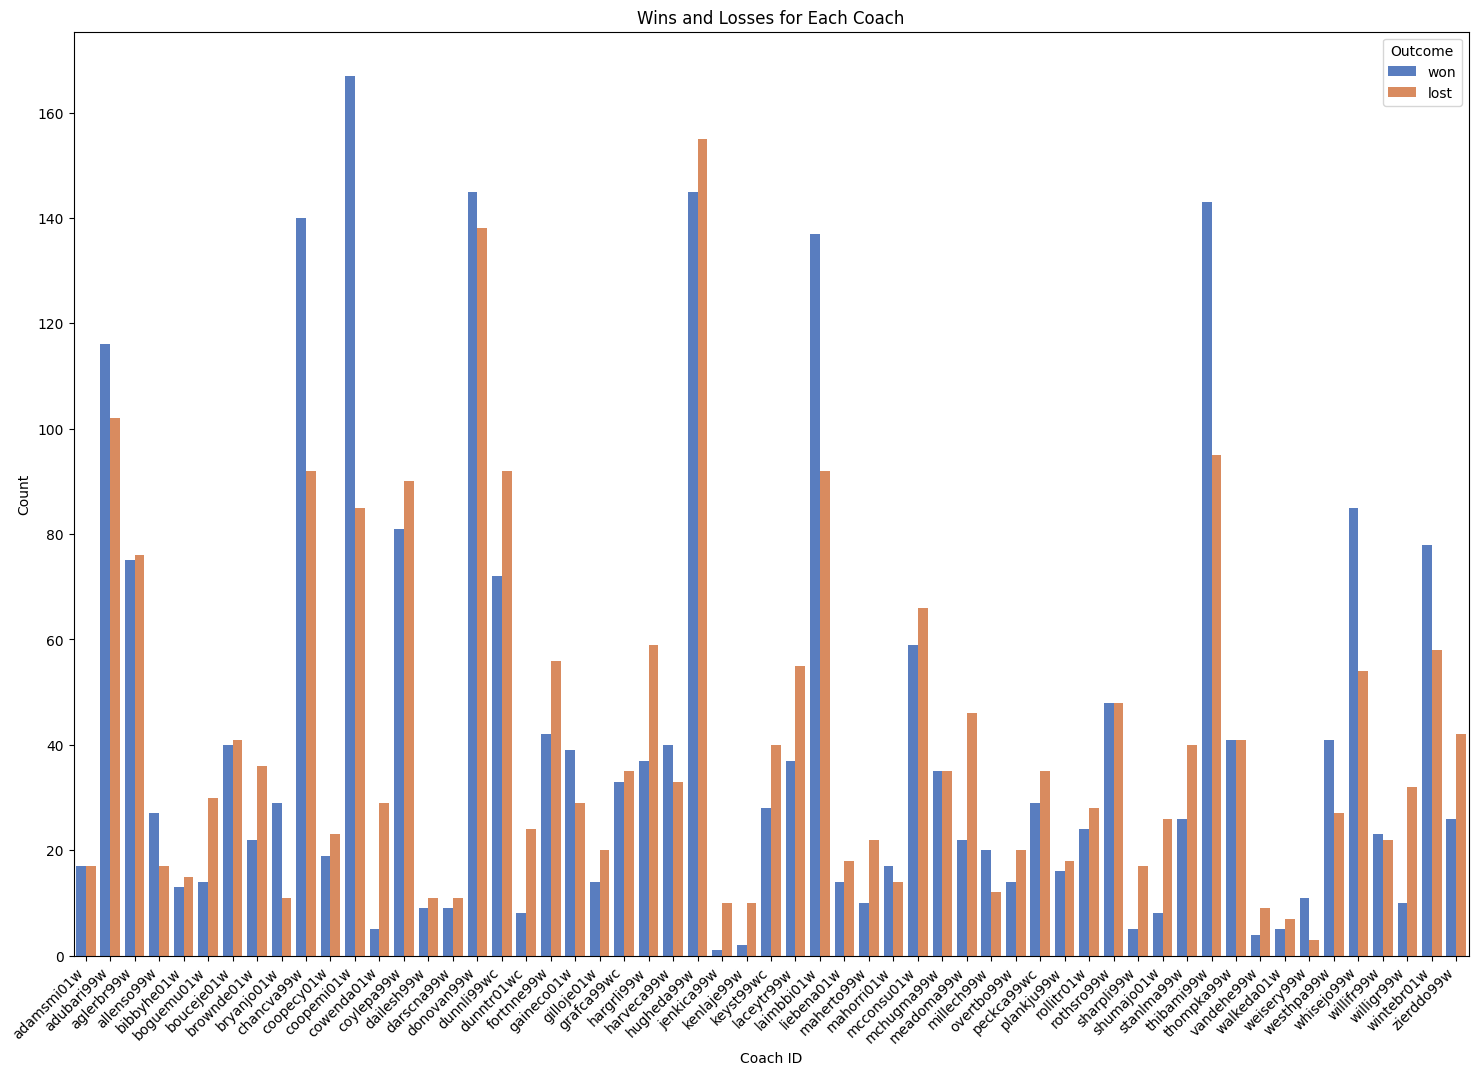

In [5]:
# Create a new DataFrame with wins and losses for each coach
coach_wins_losses = coaches_df.groupby('coachID').sum().reset_index()
coach_wins_losses = coach_wins_losses[['coachID', 'won', 'lost']]
coach_wins_losses['ratio'] = coach_wins_losses['won'] / (coach_wins_losses['won'] + coach_wins_losses['lost'])

# Melt the DataFrame for Seaborn's barplot
coach_wins_losses_melted = coach_wins_losses.melt(id_vars='coachID', value_vars=['won', 'lost'], var_name='Outcome', value_name='Count')

# Create the histogram for the absolute values
plt.figure(figsize=(18, 12))
sns.barplot(x='coachID', y='Count', hue='Outcome', data=coach_wins_losses_melted, palette='muted')
plt.title('Wins and Losses for Each Coach')
plt.xlabel('Coach ID')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()


### Barplot with ratio of wins to losses for each coach

<Axes: title={'center': 'Win/Loss ratio per coach'}, xlabel='coachID'>

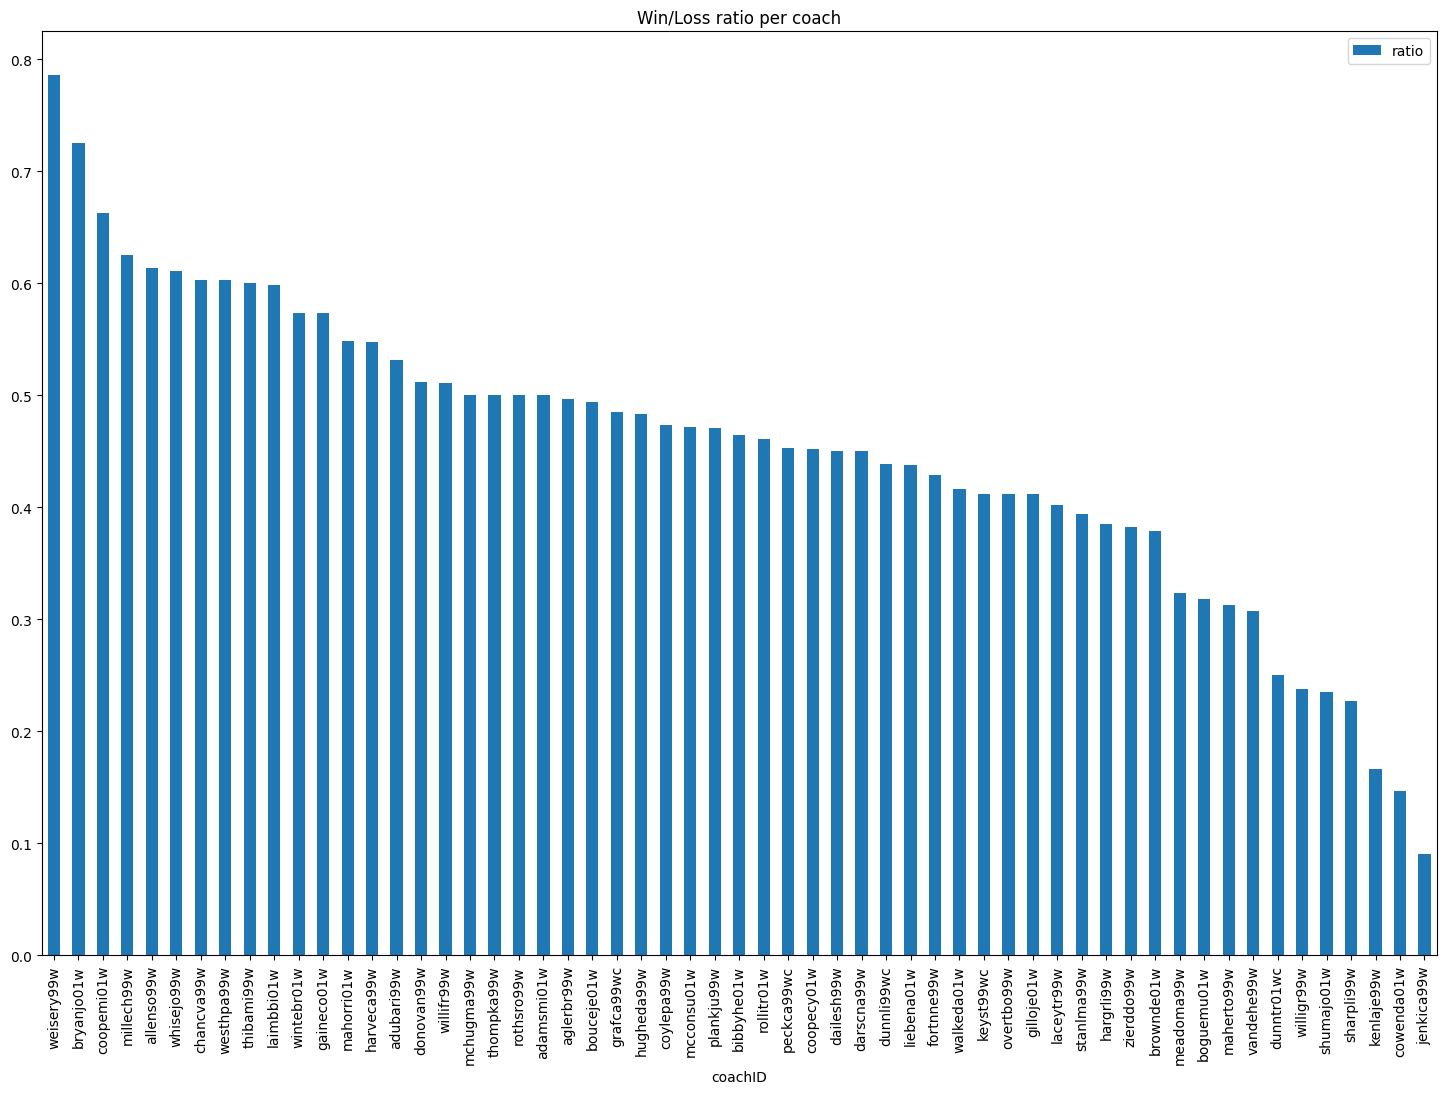

In [6]:
# Create the histogram for the ratio
coach_wins_losses[['coachID', 'ratio']].sort_values('ratio', ascending=False).plot(x='coachID', y='ratio', kind='bar', figsize=(18, 12), title="Win/Loss ratio per coach")

## Players dataset exploration

### College exploration

Number of colleges: 160


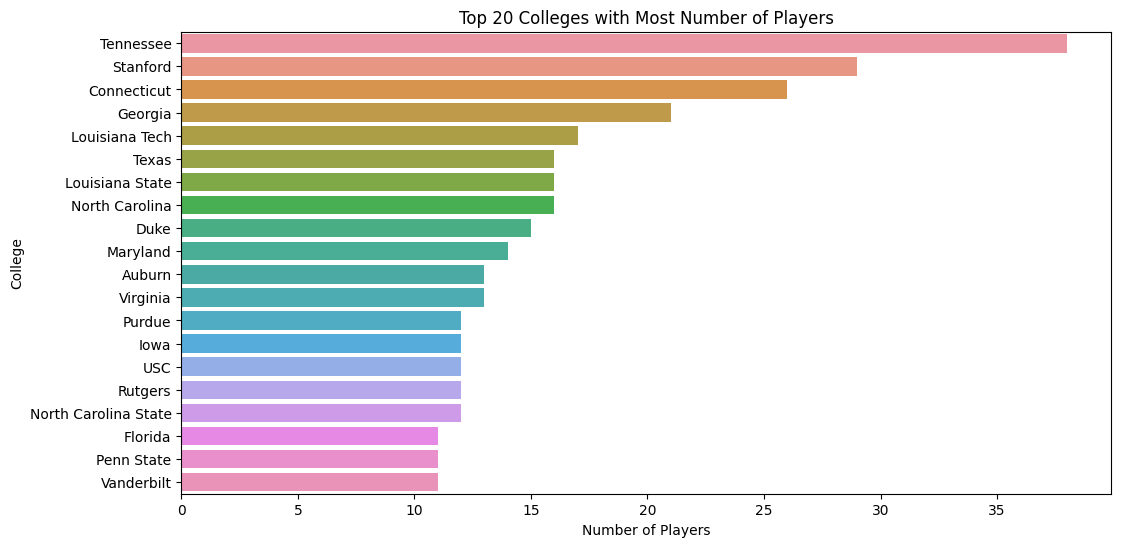

In [7]:
# Number of unique college values
num_colleges = players_df['college'].nunique()
print("Number of colleges:", num_colleges) # 160

# Count the number of players for each college
players_per_college = players_df['college'].value_counts().reset_index()
players_per_college.columns = ['College', 'Player Count']

# Select the top 20 colleges
top_20_colleges = players_per_college.head(20)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Player Count', y='College', data=top_20_colleges)
plt.title('Top 20 Colleges with Most Number of Players')
plt.xlabel('Number of Players')
plt.ylabel('College')
plt.show()

### Mean values for player attributes

### Average height and weight of players

In [8]:
# Drop rows with 0 values 
players_df.drop(players_df[players_df['height'] == 0].index, inplace = True)
players_df.drop(players_df[players_df['weight'] == 0].index, inplace = True)

# Conversion functions
def inches_to_cmeters(inches):
    return inches * 2.54

def pounds_to_kg(pounds):
    return pounds * 0.453592

# Average height
average_height_inches = players_df['height'].mean()
print("Average height (inches):", average_height_inches) # 71.9 inches
print("Average height (cm):", inches_to_cmeters(average_height_inches)) # 71.9 inches

# Average weight
average_weight_lbs = players_df['weight'].mean()
print("\nAverage weight (pounds):", average_weight_lbs) # 167.77 pounds
print("Average weight (kg):", pounds_to_kg(average_weight_lbs)) # 167.77 pounds

Average height (inches): 71.91472868217055
Average height (cm): 182.66341085271318

Average weight (pounds): 167.77260981912144
Average weight (kg): 76.10031363307493


### Average Height per team

bioID tmID pos  firstseason  lastseason  height  weight      college   
0  abrossv01w  MIN   F            0           0    74.0     169  Connecticut  \
1  abrossv01w  MIN   F            0           0    74.0     169  Connecticut   
2  abrossv01w  MIN   F            0           0    74.0     169  Connecticut   
3  abrossv01w  MIN   F            0           0    74.0     169  Connecticut   
4  abrossv01w  MIN   F            0           0    74.0     169  Connecticut   

  collegeOther   birthDate   deathDate  
0          NaN  1980-07-09  0000-00-00  
1          NaN  1980-07-09  0000-00-00  
2          NaN  1980-07-09  0000-00-00  
3          NaN  1980-07-09  0000-00-00  
4          NaN  1980-07-09  0000-00-00

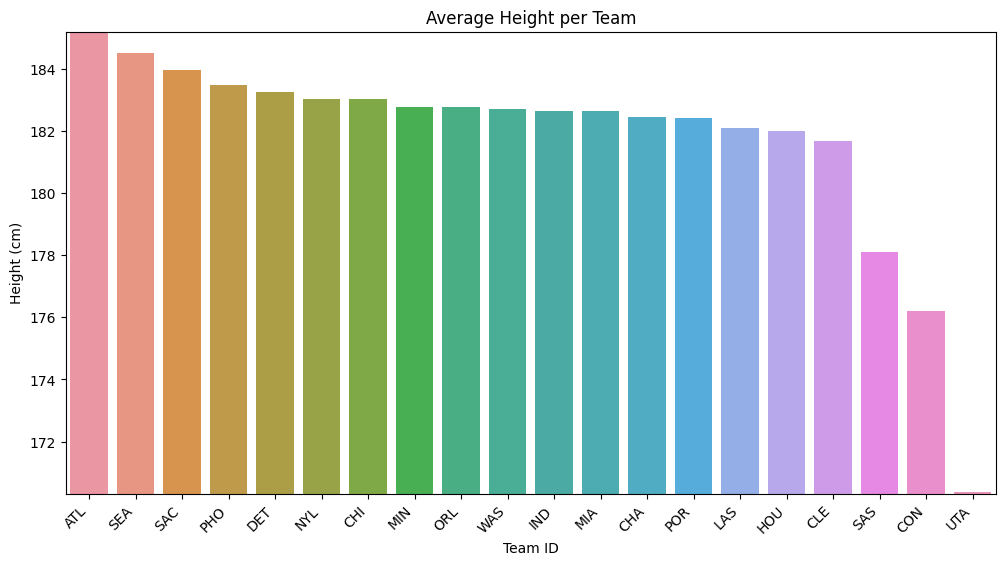

In [9]:
pivot = players_teams_df[['playerID', 'tmID']]
pivot = pivot.rename(columns={'playerID': 'bioID'})

merged_data = pd.merge(pivot, players_df, on='bioID')

display(merged_data.head())

# join dataframes
average_height_per_team_inches = merged_data.groupby('tmID')['height'].mean().reset_index()

# Convert height to meters
average_height_per_team_inches['height'] = average_height_per_team_inches['height'].apply(inches_to_cmeters)

# Rename the column
average_height_per_team_inches.columns = ['teamID', 'height']

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='teamID', y='height', data=average_height_per_team_inches.sort_values('height', ascending=False))
plt.title('Average Height per Team')
plt.xlabel('Team ID')
plt.ylabel('Height (cm)')
plt.ylim(average_height_per_team_inches['height'].min() - 0.05, average_height_per_team_inches['height'].max() + 0.05)
plt.xticks(rotation=45, ha='right')
plt.show()

### Player positions exploration

Player positions: ['C' 'F' 'F-C' 'G' 'F-G' 'G-F' 'C-F']
Number of unique positions: 7


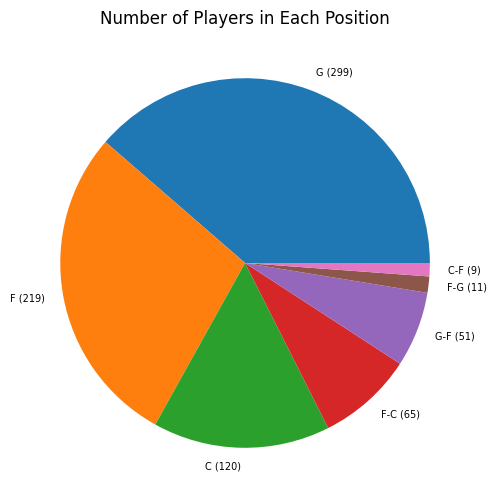

In [10]:
# Plot for number of players in each position
positions = players_df['pos'].unique()
num_positions = players_df['pos'].nunique()

print("Player positions:", positions) # center, forward, forward-center, guard, forward-guard, guard-forward, center-forward
print("Number of unique positions:", num_positions) 

# Count the number of players for each position
players_per_position = players_df['pos'].value_counts().reset_index()
players_per_position.columns = ['Position', 'Player Count']

# Sort positions based on player count
players_per_position = players_per_position.sort_values(by='Player Count', ascending=False)

# Create a pie chart 
plt.figure(figsize=(10, 6))
plt.pie(
    players_per_position['Player Count'], 
    labels=[f"{pos} ({count})" for pos, 
            count in zip(players_per_position['Position'], 
                         players_per_position['Player Count'])], # display count for each position
    # autopct='%1.1f%%',
    textprops={'fontsize': 7},
)
plt.title('Number of Players in Each Position')
plt.show()

## Teams post dataset exploration

### Histogram of wins and losses for each team (Post-Season)

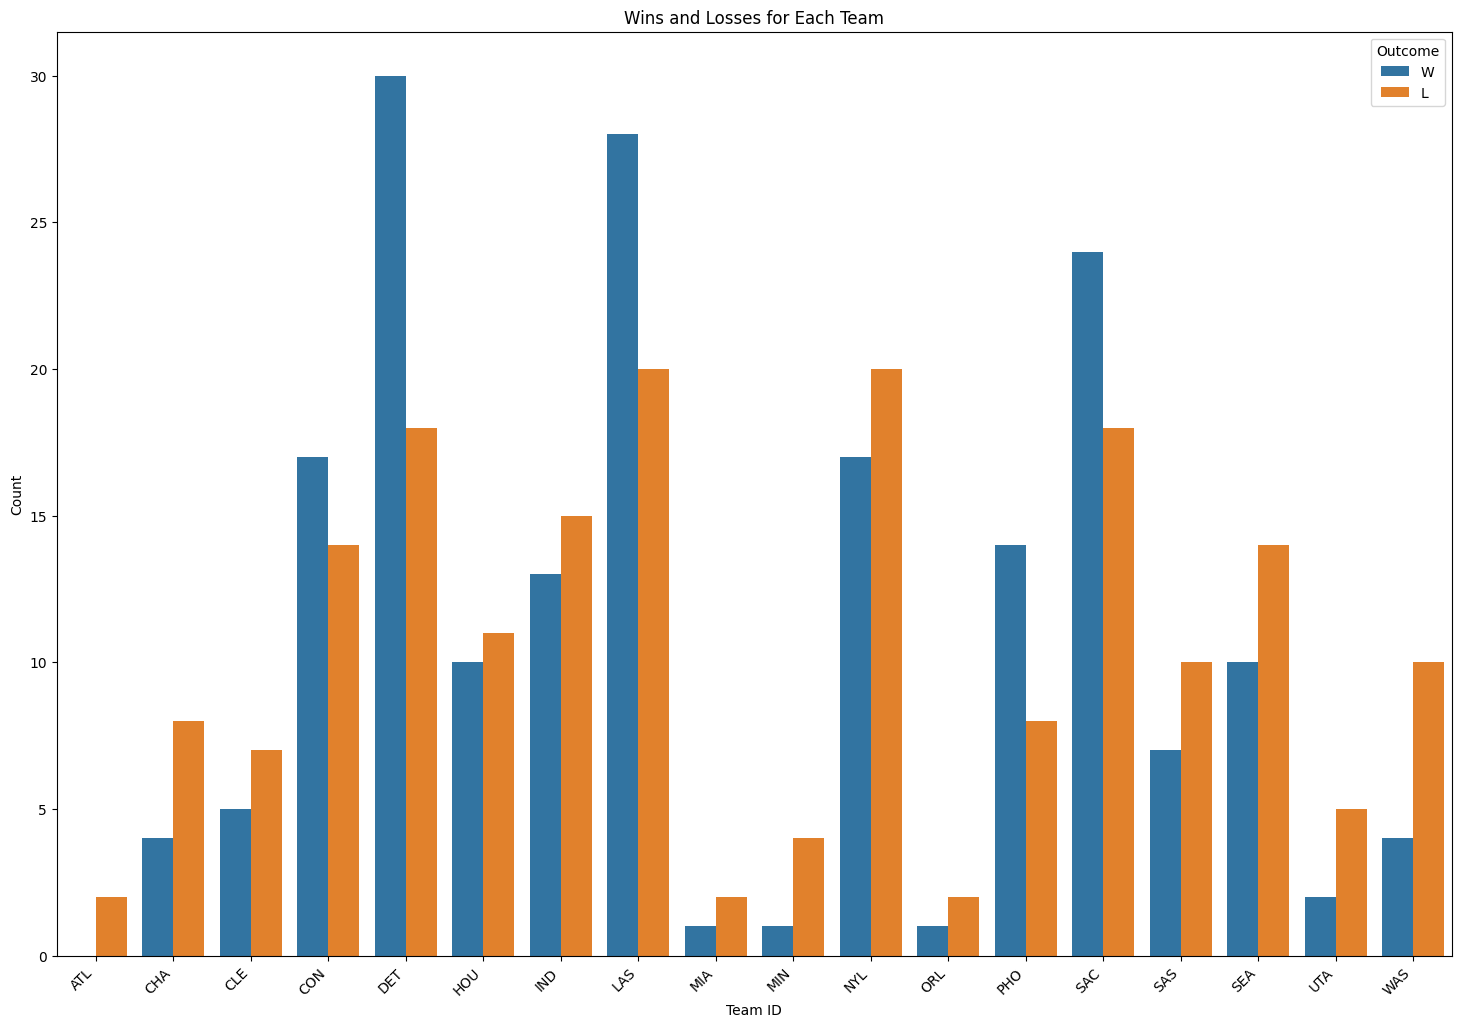

In [11]:
# Create a new DataFrame with wins and losses for each team
team_wins_losses = teams_post_df.groupby('tmID').sum().reset_index()
team_wins_losses = team_wins_losses[['tmID', 'W', 'L']]
team_wins_losses['ratio'] = team_wins_losses['W'] / (team_wins_losses['W'] + team_wins_losses['L'])

# Melt the DataFrame for Seaborn's barplot
melted_team_data = team_wins_losses.melt(id_vars='tmID', value_vars=['W', 'L'], var_name='Outcome', value_name='Count')

# Create the histogram for the absolute values
plt.figure(figsize=(18, 12))
sns.barplot(x='tmID', y='Count', hue='Outcome', data=melted_team_data)
plt.title('Wins and Losses for Each Team')
plt.xlabel('Team ID')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

## Teams dataset exploration

### Heatmap for teams dataset

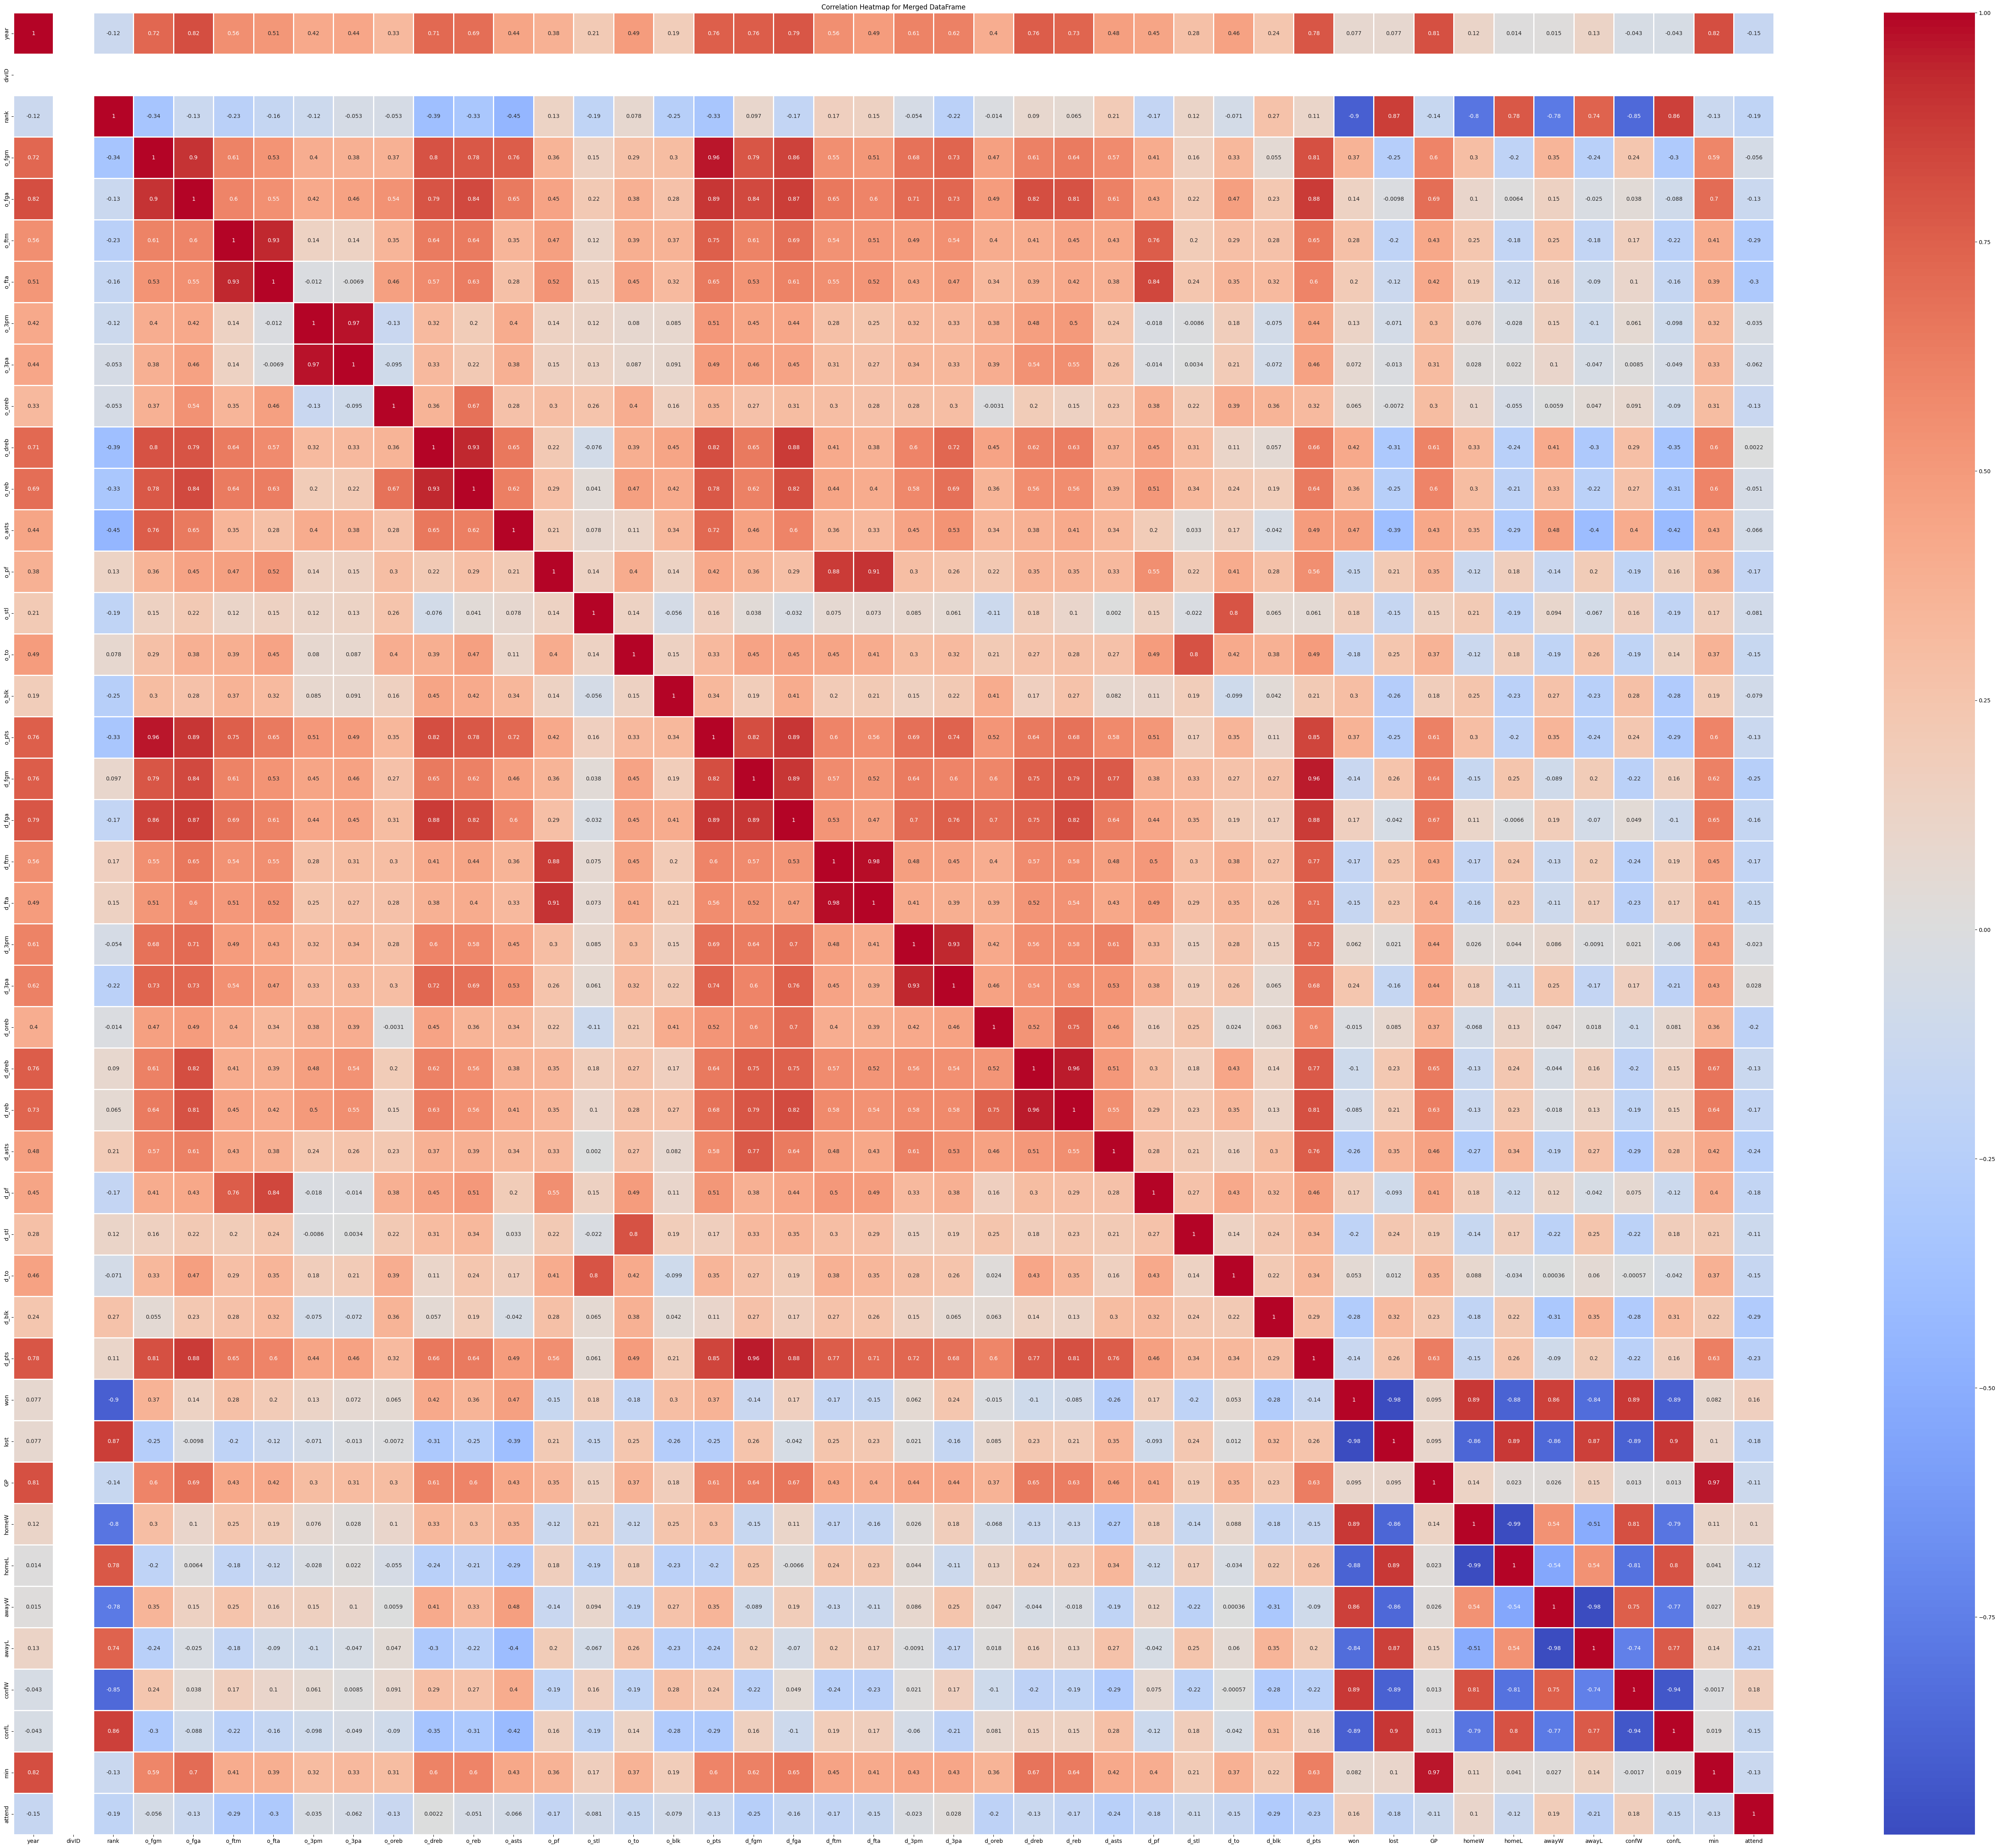

In [12]:
# Drop columns with only 0 values
zero_columns = teams_df.columns[(teams_df == 0).all()]
teams_df = teams_df.drop(columns=zero_columns)

# Extract only numeric columns
numeric_columns = teams_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(72, 60))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap for Merged DataFrame')
plt.show()

### Exploration of points per game in each year for each team

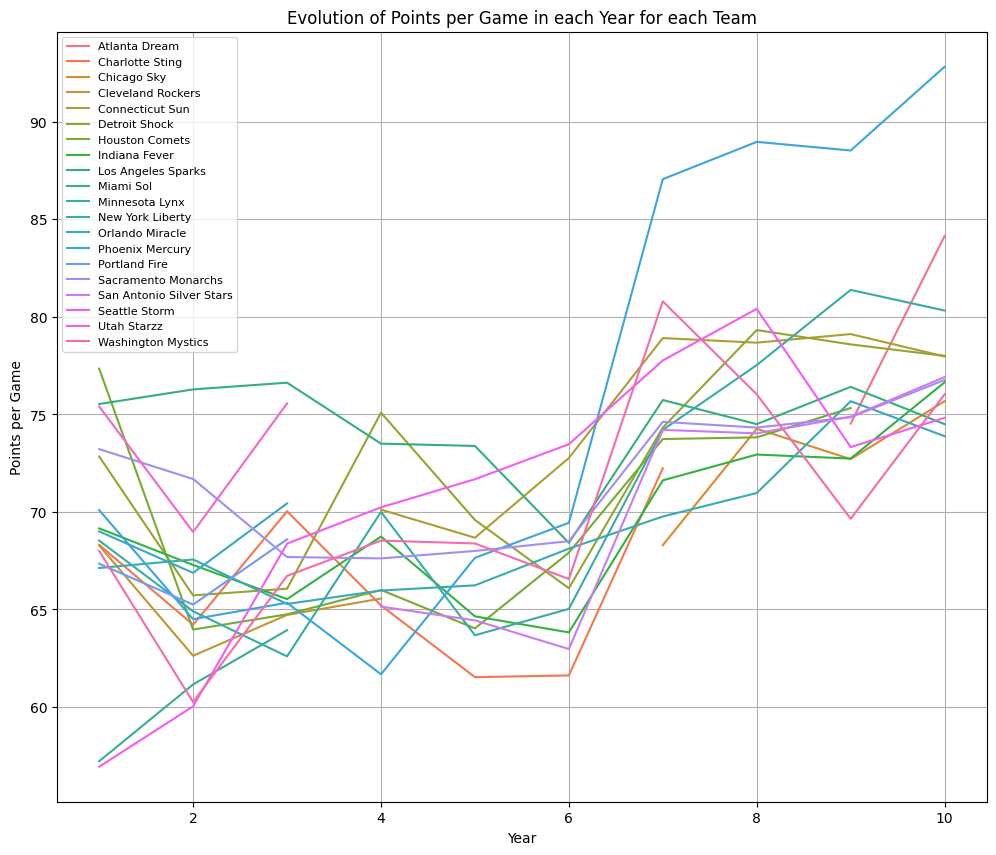

In [13]:
# Add points per game (PPG) column (points/games played)
teams_df['PPG'] = teams_df['o_pts'] / teams_df['GP']

# Create plot
plt.figure(figsize=(12, 10))
sns.lineplot(data=teams_df, x='year', y='PPG', hue='name')

plt.title('Evolution of Points per Game in each Year for each Team')
plt.xlabel('Year')
plt.ylabel('Points per Game')
plt.legend(loc='upper left', fontsize = '8')
plt.grid(True)
plt.show()

## Data exploration for merged dataset

In [14]:
main_df = pd.read_csv("../data/clean/main_df.csv")

: 

### Heatmap for merged dataset

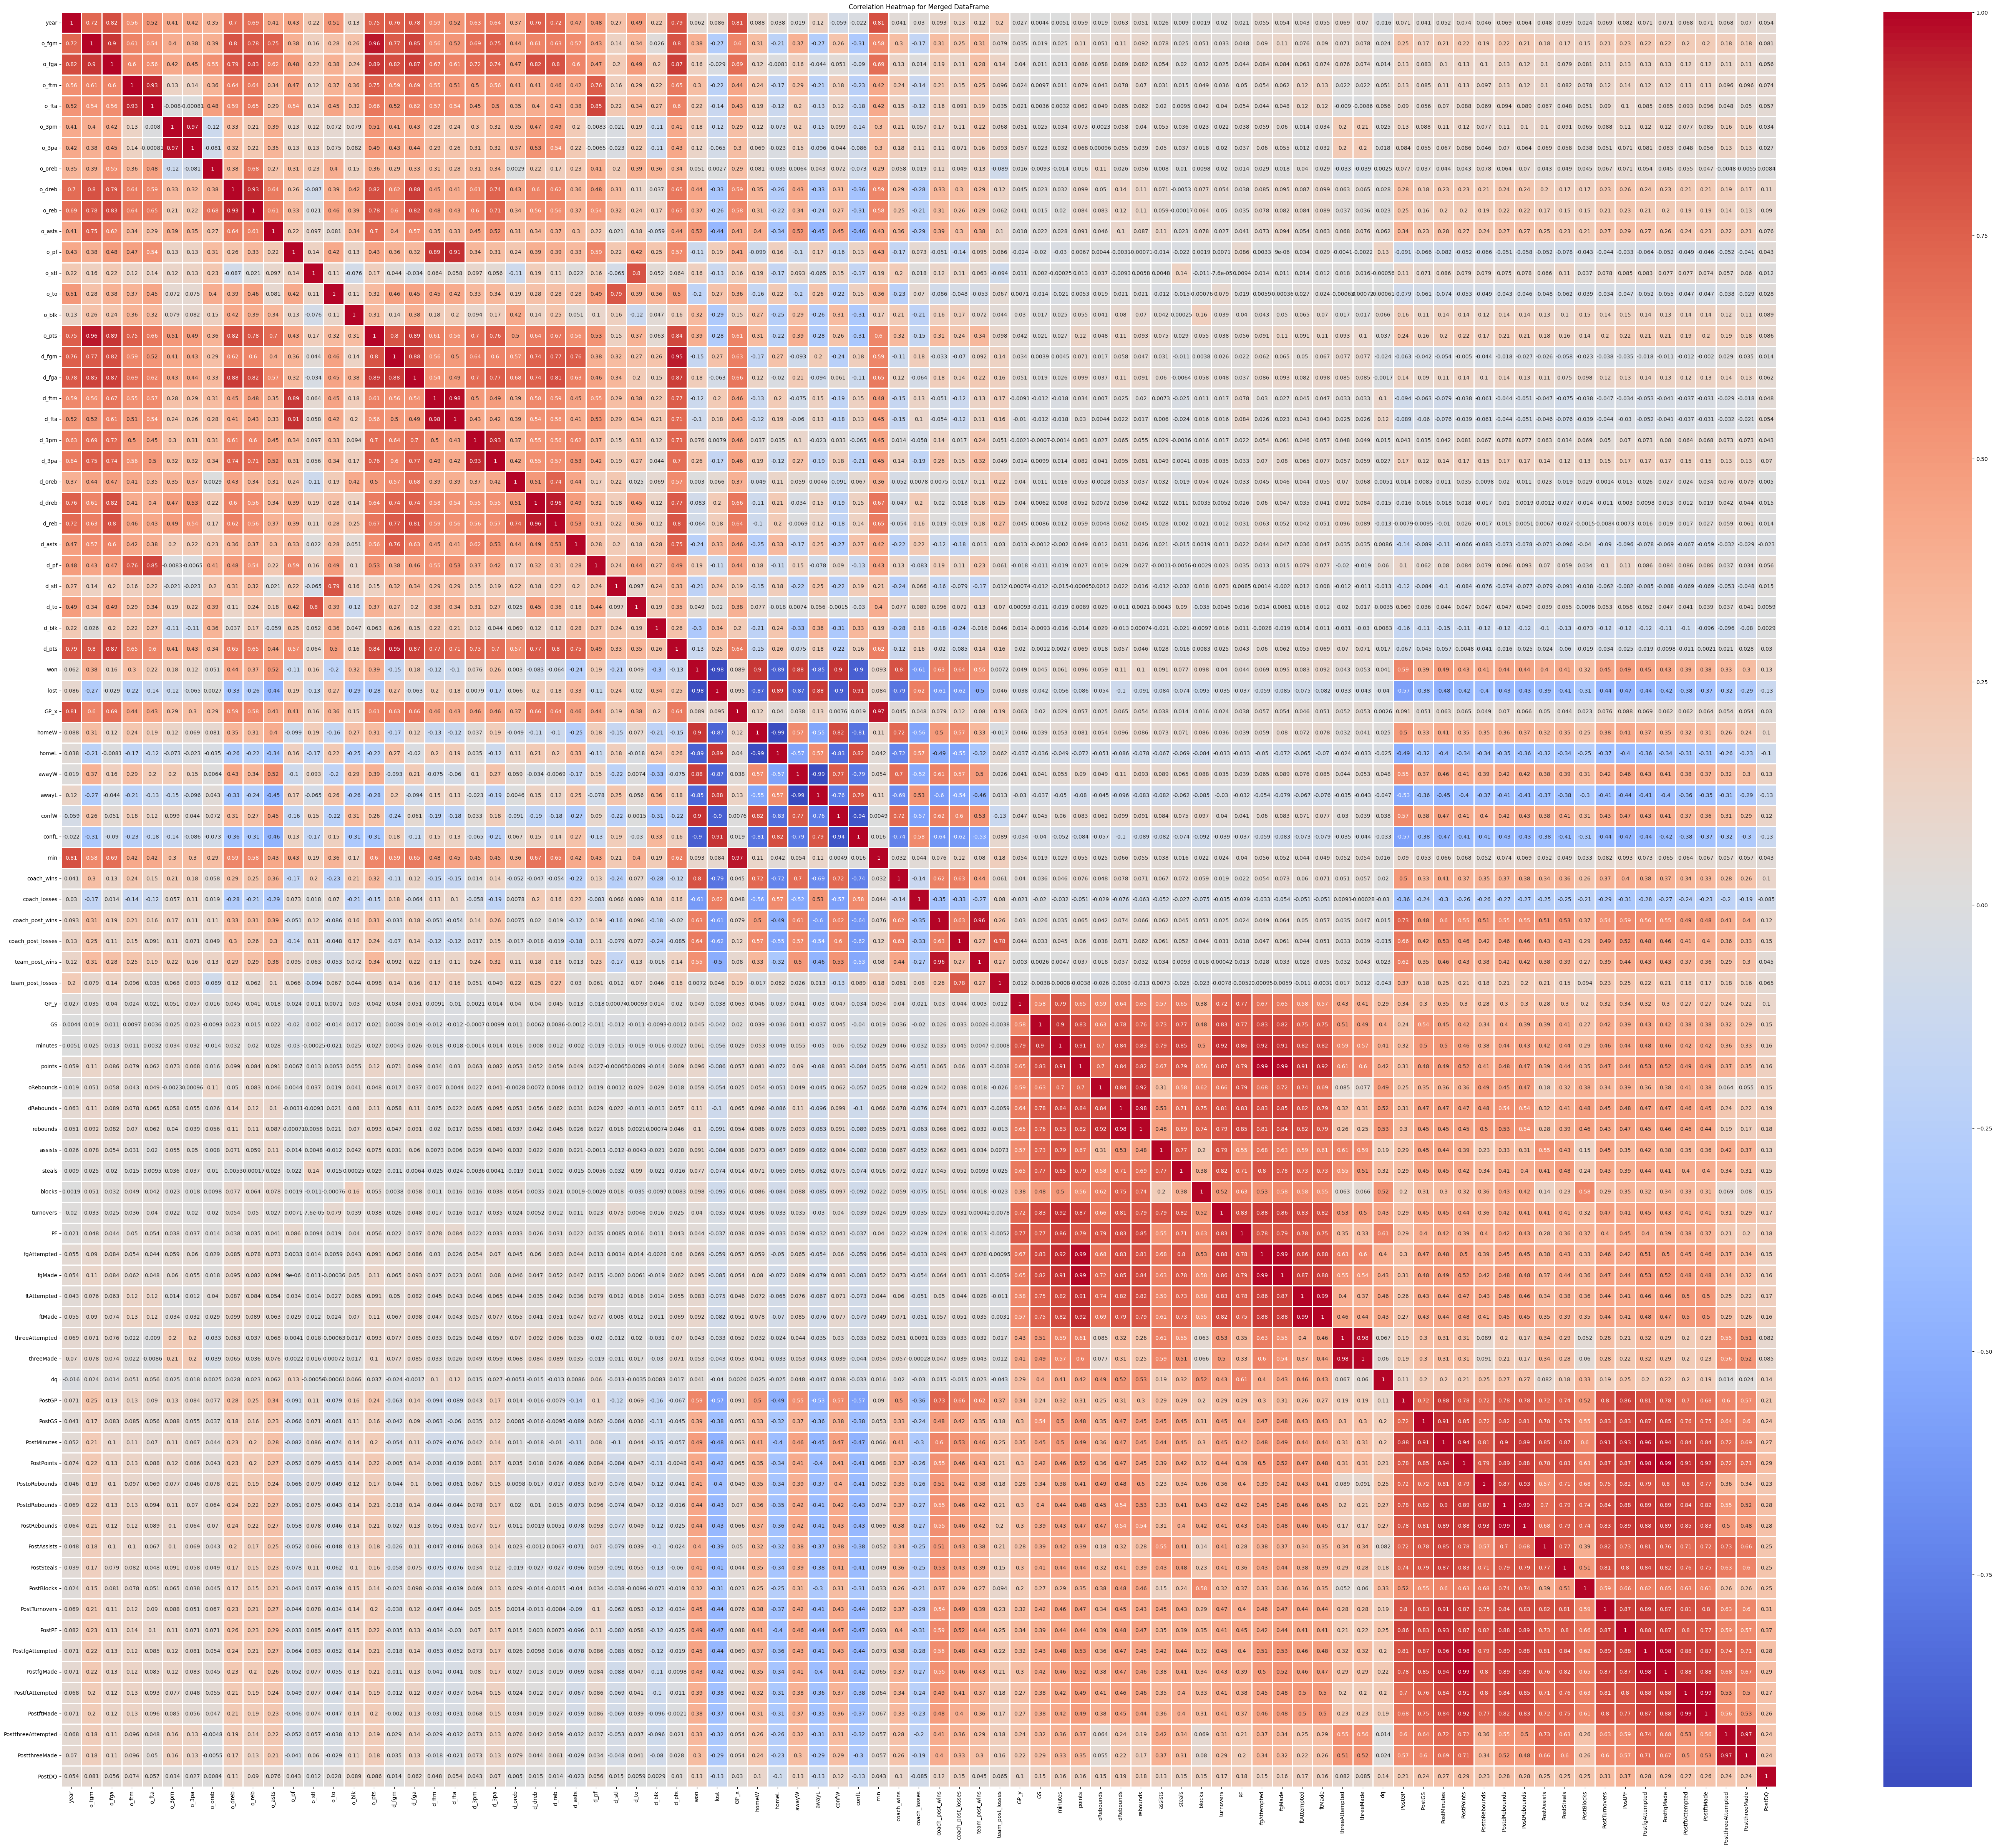

In [ ]:
# Extract only numeric columns
numeric_columns = main_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(72, 60))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap for Merged DataFrame')
plt.show()